In [45]:
from activity_tracker.preprocess import normalize_subject_id
import pandas as pd
import pathlib
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

data_dir = pathlib.Path("../data/raw/") 
data_path = data_dir / "../raw/minute/minuteStepsNarrow_merged.csv"
df = pd.read_csv(data_path).rename(columns={"Id": "subject_id", "ActivityMinute": "time", "Steps": "steps"})
df = df[df["steps"] != 0].reset_index(drop=True)
df["subject_id"] = df["subject_id"].apply(normalize_subject_id).drop(columns=["subject_id"])
df['time'] = pd.to_datetime(df['time'])

In [9]:
len(df)

552466

,subject_id,time,steps
191267,MDE034,2022-09-03 14:39:00,7
191268,MDE034,2022-09-03 14:46:00,14
191269,MDE034,2022-09-03 14:47:00,16
191270,MDE034,2022-09-03 14:51:00,32
191271,MDE034,2022-09-03 15:00:00,4
...,...,...,...
207659,MDE034,2023-02-09 09:38:00,14
207660,MDE034,2023-02-09 09:48:00,16
207661,MDE034,2023-02-09 09:52:00,14
207662,MDE034,2023-02-09 10:04:00,15


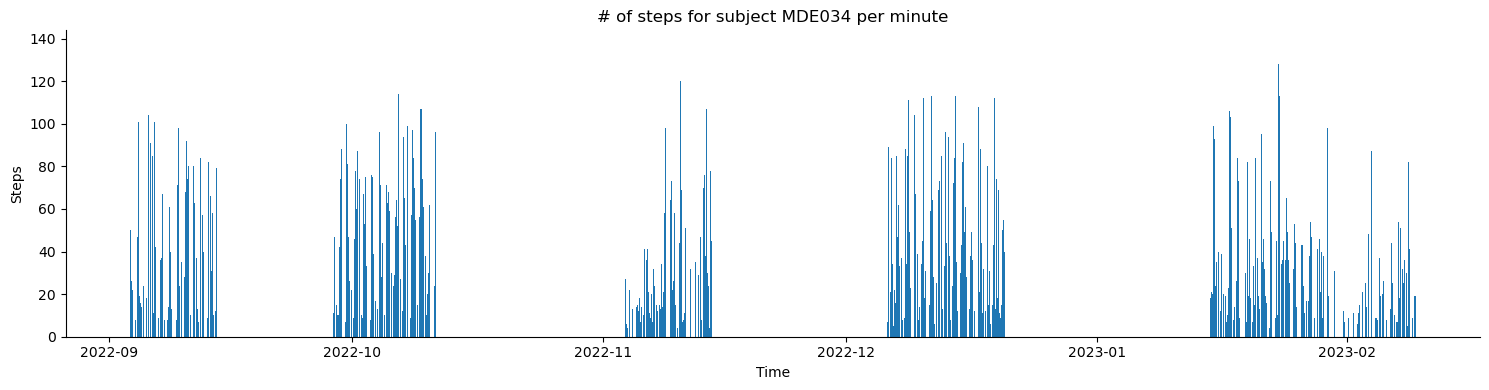

In [78]:
subject_id = 'MDE034'
df_subject = df[df['subject_id'] == subject_id]

plt.figure(figsize=(15, 4))
plt.bar(df_subject['time'], df_subject['steps'], width=0.02)
plt.title(f'# of steps for subject {subject_id} per minute')
plt.xlabel('Time')
plt.ylabel('Steps')
sns.despine()
plt.tight_layout()
plt.show()

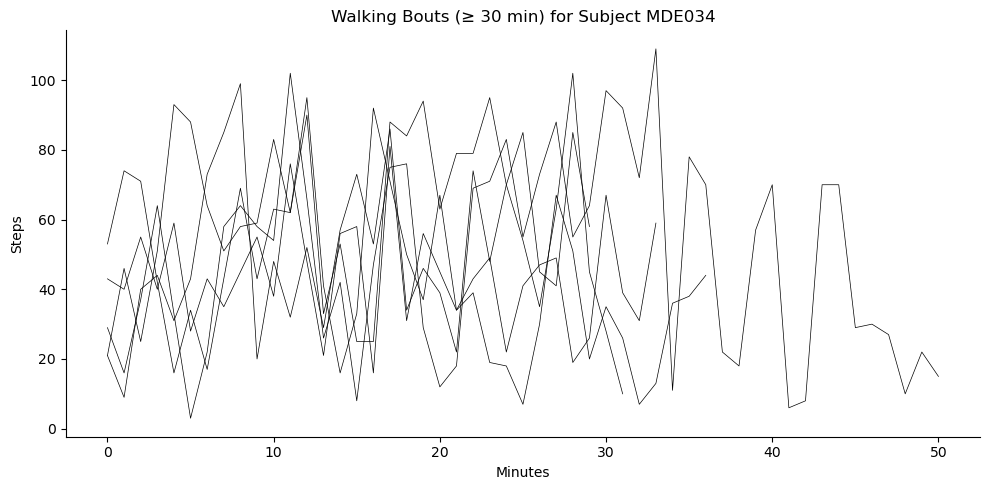

In [ ]:
# Extract walking bouts
subject_id = 'MDE034'
df_subject = df[df['subject_id'] == subject_id].copy()
df_subject = df_subject.sort_values('time').reset_index(drop=True)

df_subject['time_diff'] = df_subject['time'].diff().dt.total_seconds().div(60).fillna(1)
df_subject['new_bout'] = df_subject['time_diff'] > 1
df_subject['bout_id'] = df_subject['new_bout'].cumsum()

# Collect all bouts with at least 2 consecutive min
bouts = []
for _, bout in df_subject.groupby('bout_id'):
    if len(bout) >= 2:
        bouts.append(bout['steps'].values)

minute_crit = 30
new_bouts = [bout for bout in bouts if len(bout) >= minute_crit]
len(new_bouts)

plt.figure(figsize=(10, 5))
for bout in new_bouts:
    plt.plot(range(len(bout)), bout, color='k', linewidth=0.5)
plt.title(f'Walking Bouts (≥ {minute_crit} min) for Subject {subject_id}')
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.tight_layout()
sns.despine()
plt.show()